In [14]:
import os
import sys
import subprocess

os.environ["FLAGS_allocator_strategy"] = 'auto_growth'
import matplotlib.pyplot as plt
import cv2
import copy
import numpy as np
import json
import time
import logging
from PIL import Image
import tools.infer.utility as utility
import tools.infer.predict_rec as predict_rec
import tools.infer.predict_det as predict_det
import tools.infer.predict_cls as predict_cls
from tools.infer.predict_system import TextSystem
from ppocr.utils.utility import get_image_file_list, check_and_read_gif
from ppocr.utils.logging import get_logger
from tools.infer.utility import draw_ocr_box_txt, get_rotate_crop_image
import argparse
logger = get_logger()


In [15]:
text_detector = './inference/en_PP-OCRv3_det_infer.onnx'
text_recognizer = './inference/PPOCRv3_rec_lisenceplate_14112022.onnx'
text_classifier = './inference/ch_ppocr_mobile_v2.0_cls_infer.onnx'
use_onnx = True

In [16]:
from paddleocr_config import get_config
args = get_config()

In [41]:
path_test = '/home/os/Desktop/SETA/Seta_Car/OPES_repoint/lisenceplate'
for img_name in os.listdir(path_test):
    print(img_name[:-4])
print(len(os.listdir(path_test)))

1669024815
1669024766
1669024781
1669024785
1669024810
1669024768
1669024833
1669024852
1669024802
1669024789
1669024840
1669024871
1669024879
1669024794
1669024792
1669024774
1669024889
1669024812
1669024819
1669024868
1669024849
1669024864
1669024839
1669024813
1669024828
1669024842
1669024886
1669024883
1669024783
1669024862
1669024773
1669024775
1669024870
1669024878
1669024874
1669024795
1669024891
1669024847
1669024867
1669024825
1669024816
1669024826
1669024827
1669024875
1669024809
1669024876
1669024893
1669024869
1669024836
1669024865
1669024855
1669024799
1669024811
1669024872
1669024838
1669024788
1669024772
1669024858
1669024791
1669024863
1669024800
1669024853
1669024848
1669024823
1669024796
1669024817
1669024798
1669024780
1669024829
1669024882
1669024895
1669024846
1669024769
1669024857
1669024843
1669024873
1669024885
1669024888
1669024803
1669024854
1669024832
1669024890
1669024894
1669024814
1669024820
1669024821
1669024861
1669024831
1669024807
1669024851
1669024778

Image 1: 1669024815.png
Image 2: 1669024766.png
Image 3: 1669024781.png
Image 4: 1669024785.png
Image 5: 1669024810.png
Image 6: 1669024768.png
Image 7: 1669024833.png
Image 8: 1669024852.png
Image 9: 1669024802.png
Image 10: 1669024789.png
Image 11: 1669024840.png
Image 12: 1669024871.png
Image 13: 1669024879.png
Image 14: 1669024794.png
Image 15: 1669024792.png
Image 16: 1669024774.png
Image 17: 1669024889.png
Image 18: 1669024812.png
Image 19: 1669024819.png
Image 20: 1669024868.png
Image 21: 1669024849.png
Image 22: 1669024864.png
Image 23: 1669024839.png
Image 24: 1669024813.png
Image 25: 1669024828.png
Image 26: 1669024842.png
Image 27: 1669024886.png
Image 28: 1669024883.png
Image 29: 1669024783.png
Image 30: 1669024862.png
Image 31: 1669024773.png
Image 32: 1669024775.png
Image 33: 1669024870.png
Image 34: 1669024878.png
Image 35: 1669024874.png
Image 36: 1669024795.png
Image 37: 1669024891.png
Image 38: 1669024847.png
Image 39: 1669024867.png
Image 40: 1669024825.png
Image 41:

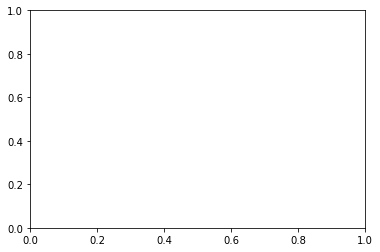

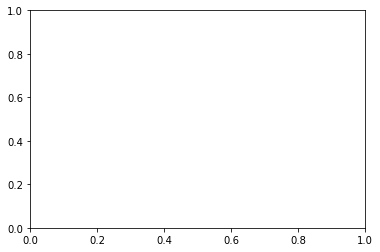

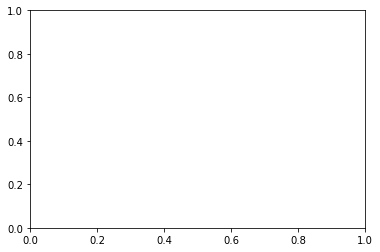

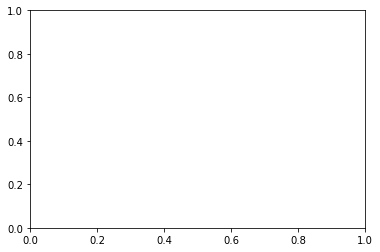

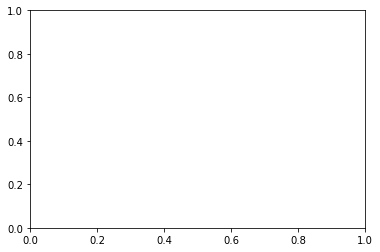

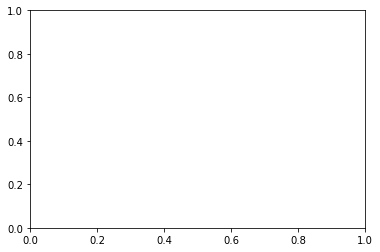

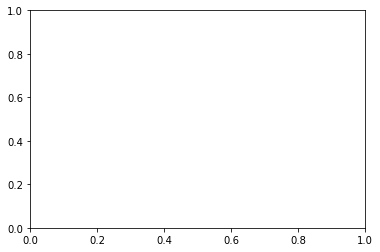

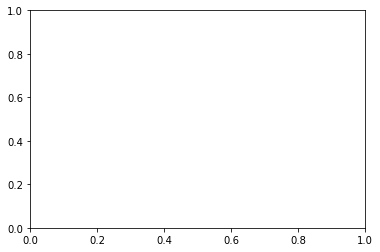

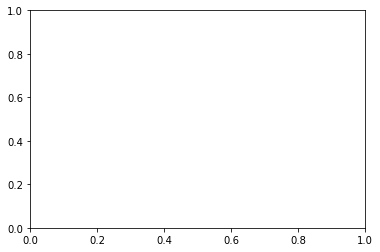

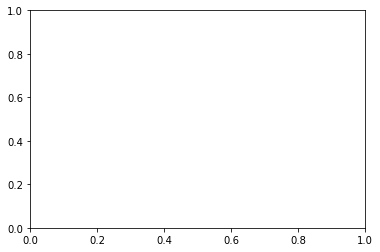

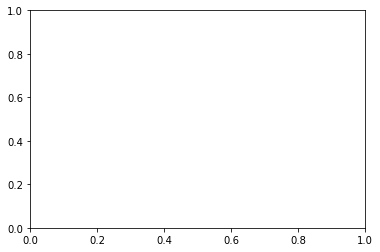

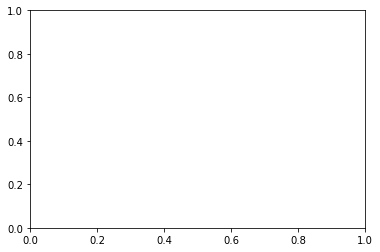

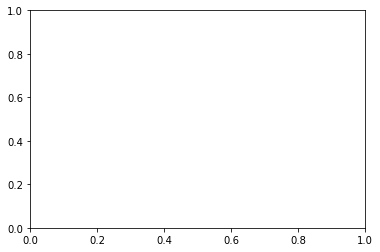

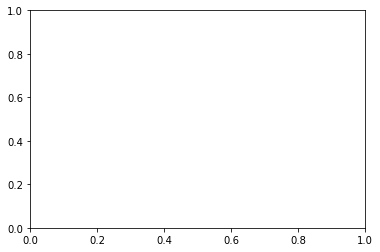

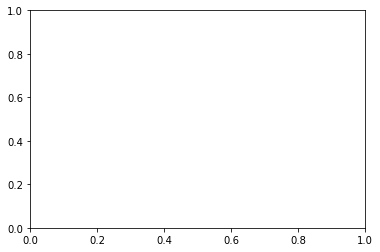

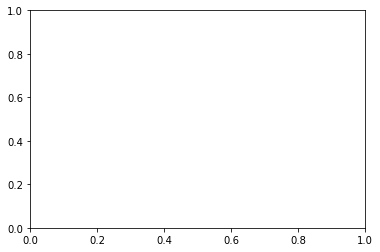

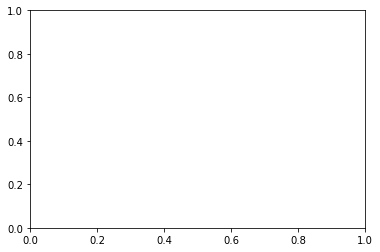

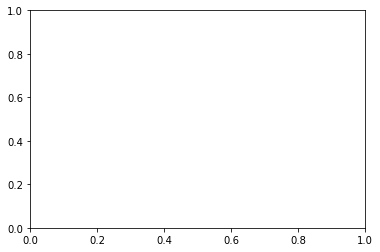

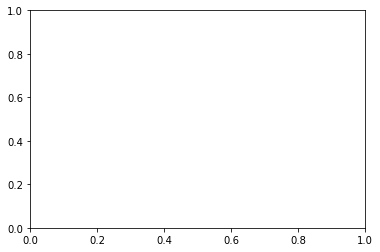

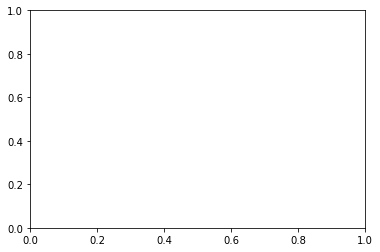

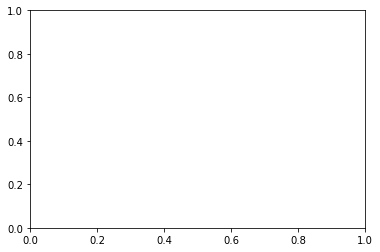

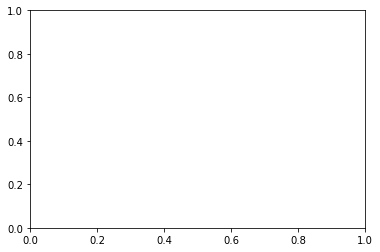

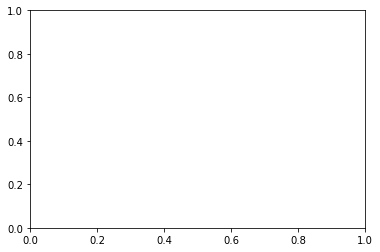

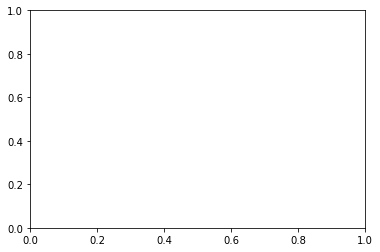

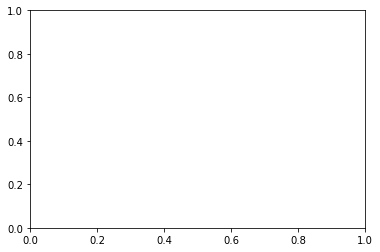

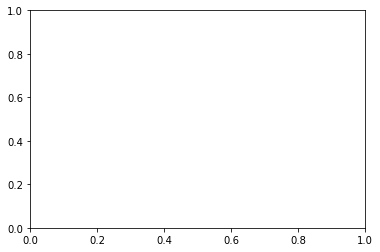

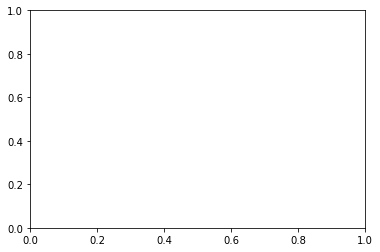

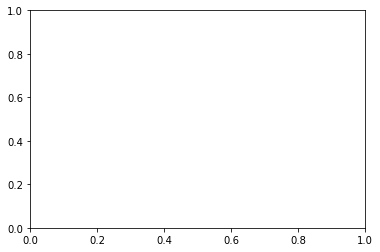

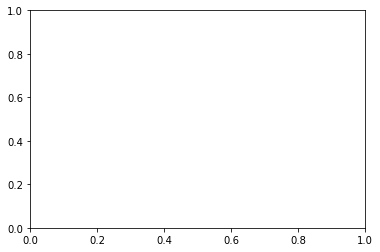

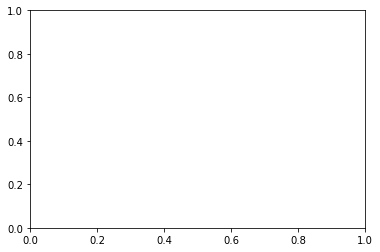

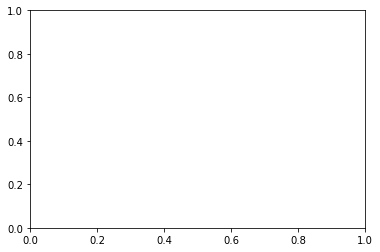

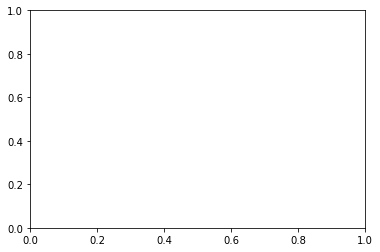

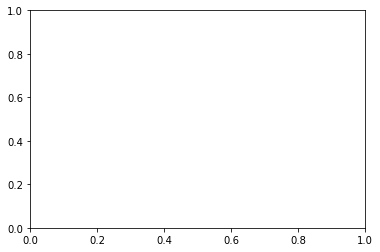

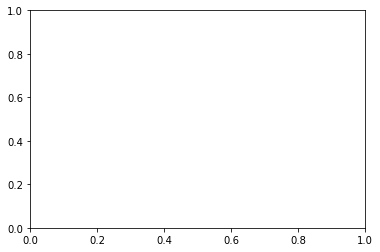

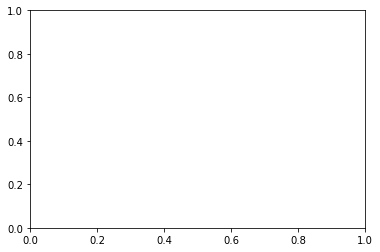

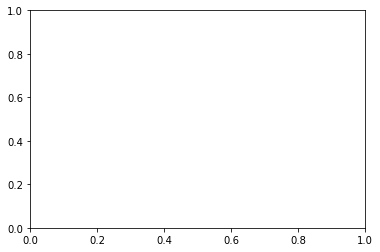

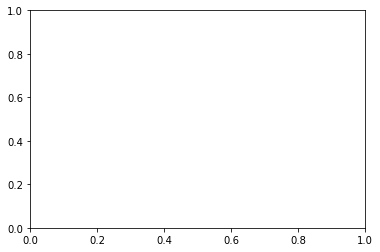

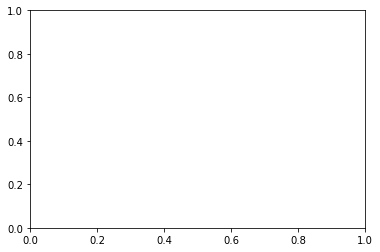

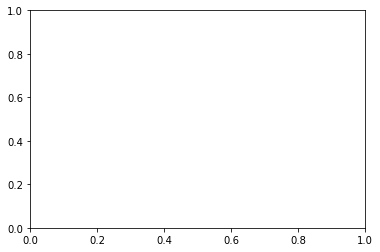

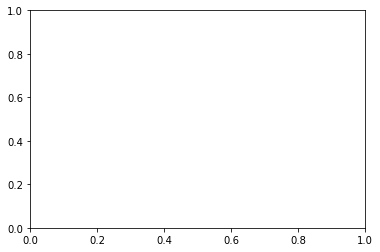

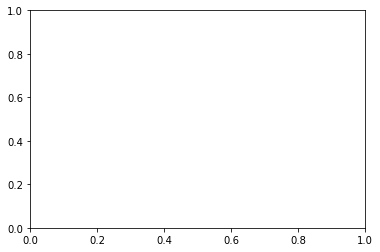

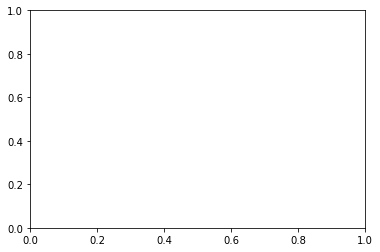

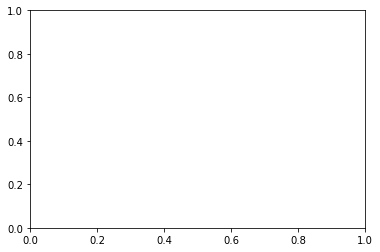

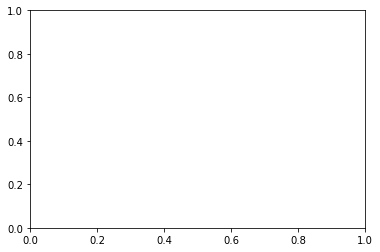

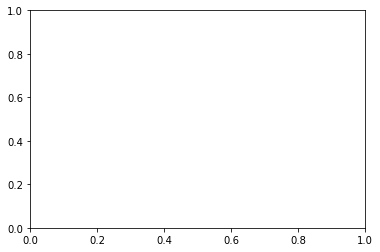

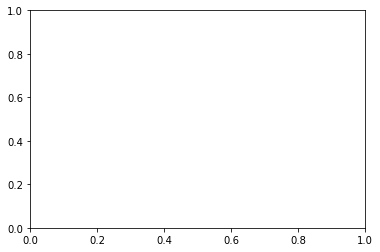

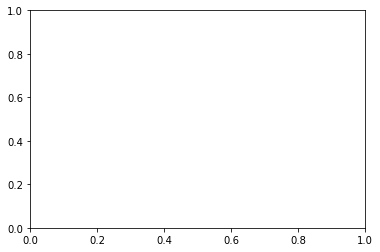

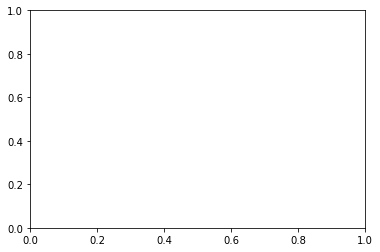

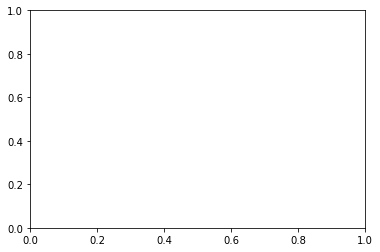

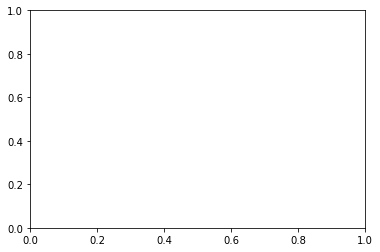

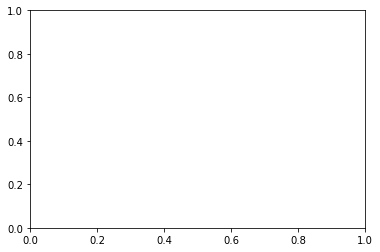

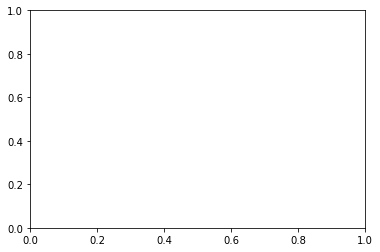

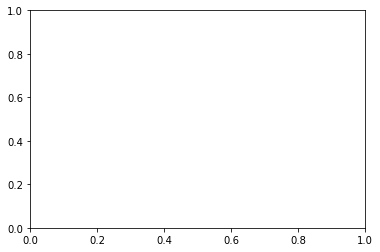

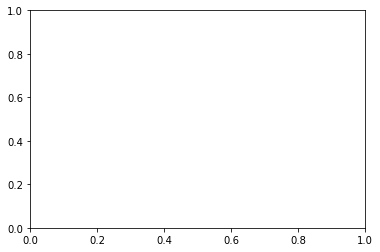

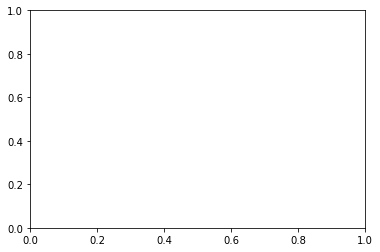

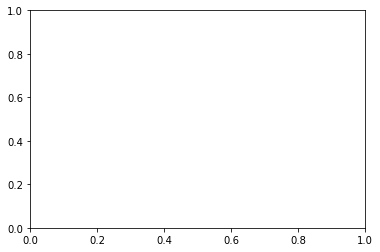

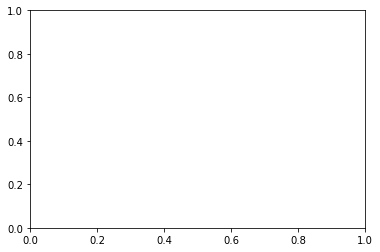

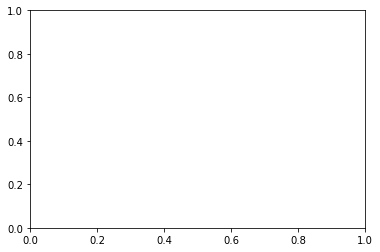

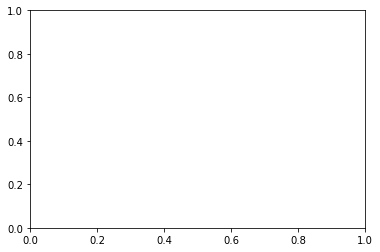

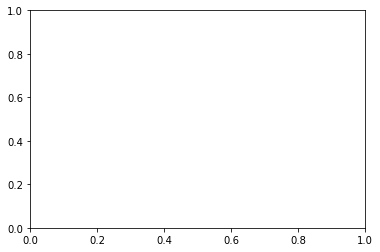

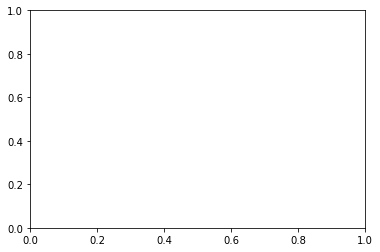

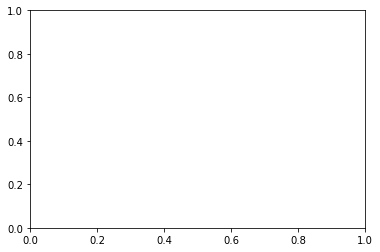

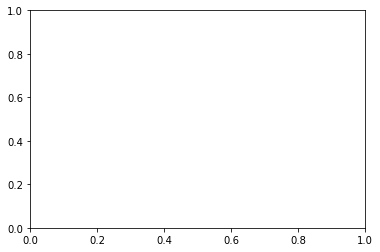

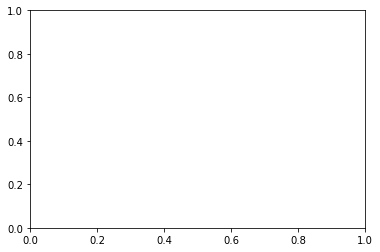

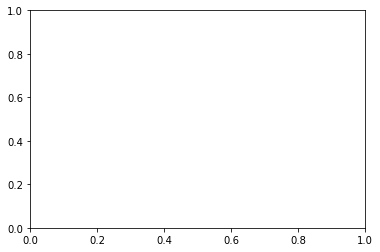

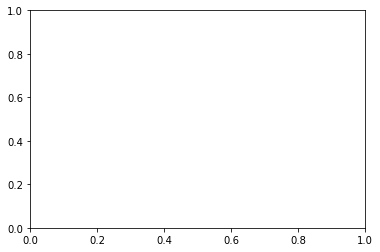

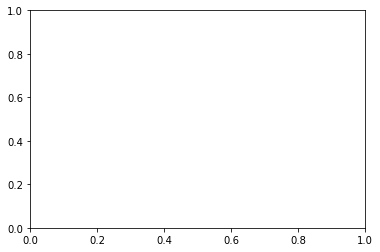

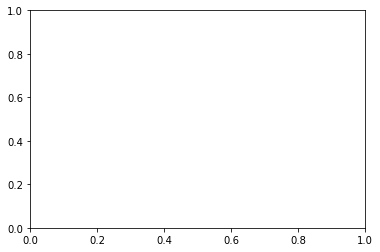

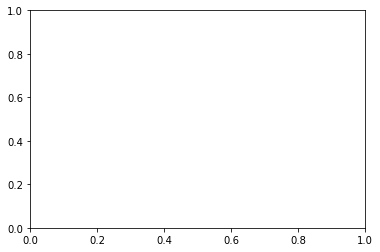

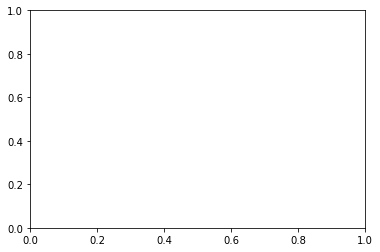

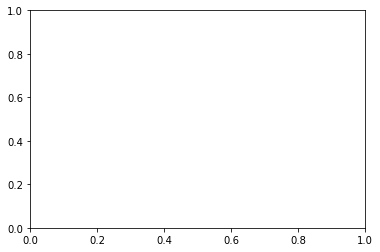

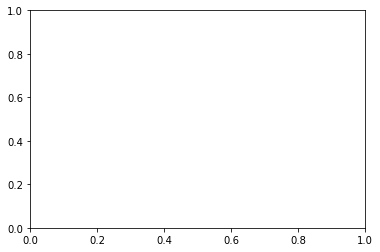

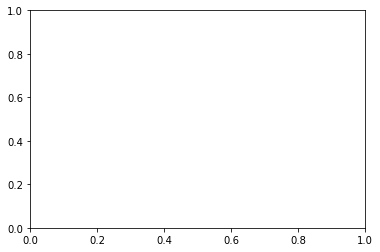

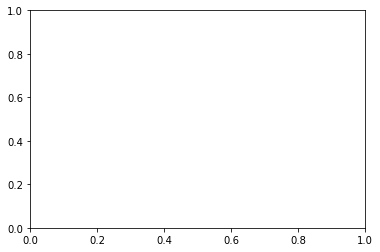

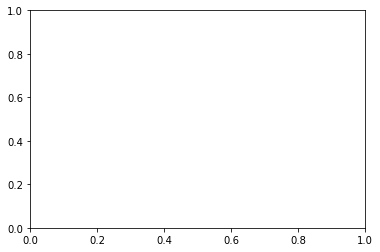

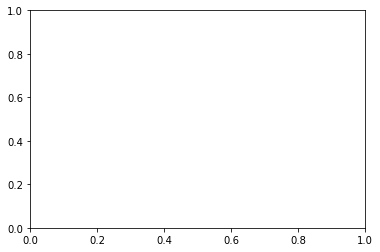

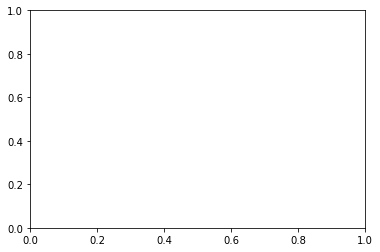

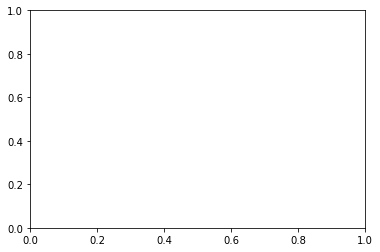

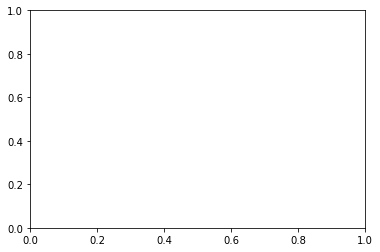

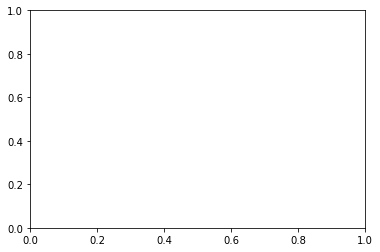

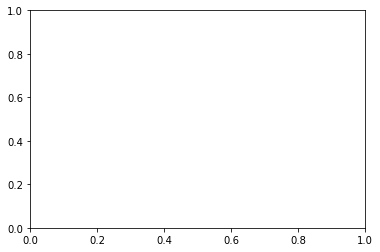

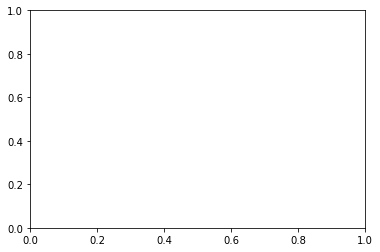

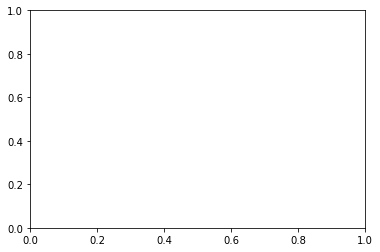

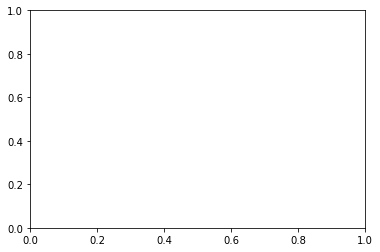

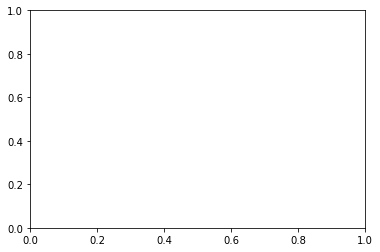

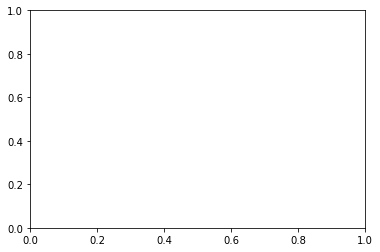

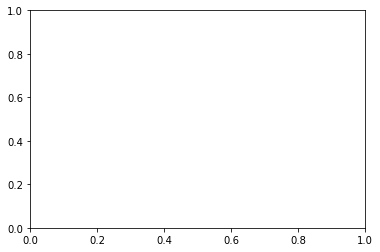

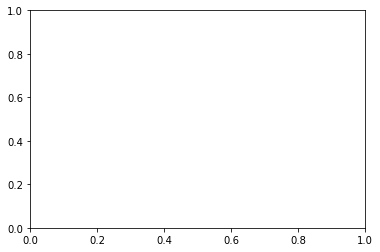

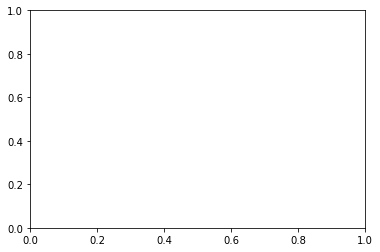

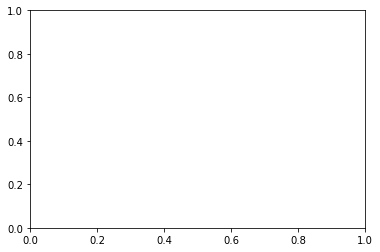

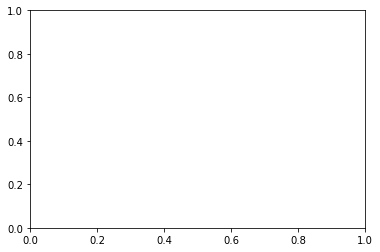

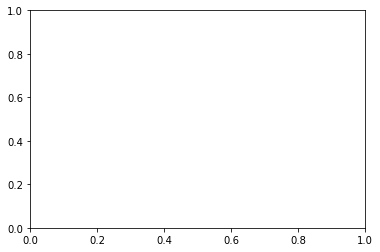

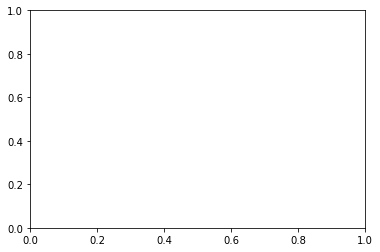

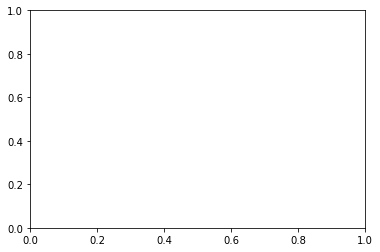

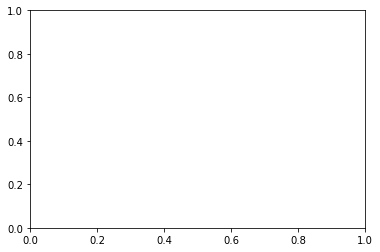

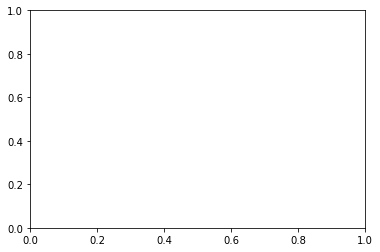

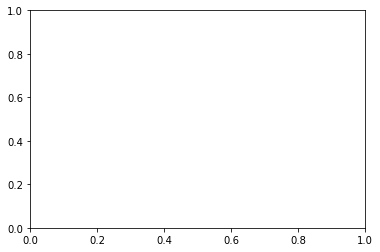

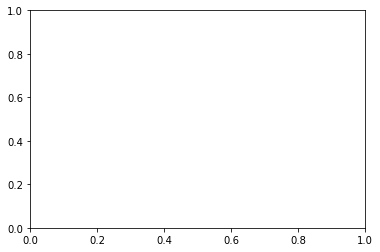

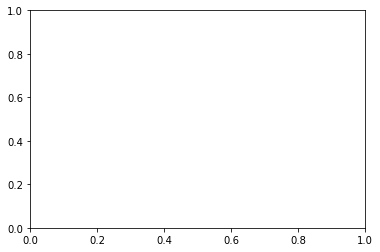

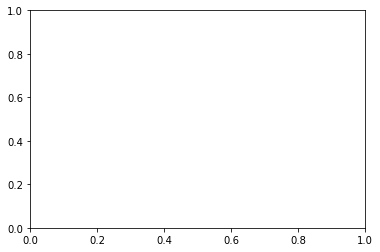

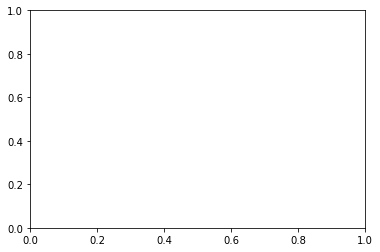

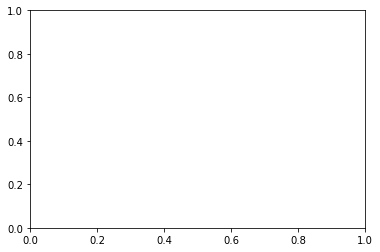

In [49]:
count = 0
for img_name in os.listdir(path_test):
    count = count+1
    print(f'Image {count}: {img_name}')
    fig, ax = plt.subplots(1,1)
    img_path = os.path.join(path_test,img_name)
    #img_plot = Image.open(img_path)
    #plt.imshow(img_plot)

    args.image_dir = img_path
    image_file = args.image_dir
    text_sys = TextSystem(args)


    save_results = []
    total_time = 0
    _st = time.time()

    img = cv2.imread(image_file)
    if img is None:
        logger.debug("error in loading image:{}".format(image_file))

    starttime = time.time()
    dt_boxes, rec_res = text_sys(img)
    elapse = time.time() - starttime
    total_time += elapse

    # for text, score in rec_res:
    #     logger.debug("{}, {:.3f}".format(text, score))
    #print(str(img_name) + "  Predict time of %s: %.3fs" % (image_file, elapse))
    #for text, score in rec_res:
        #print(text, score)
    res = [{
         "transcription": rec_res[idx][0],
         "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
    } for idx in range(len(dt_boxes))]
    if len(res)>0:
        for box in res:
            x1, x2, x3, x4 = box['points']
            try:
                cv2.imwrite('/home/os/Desktop/SETA/PaddleOCR-Studycases/train_data_lisenceplate_27112022/'+str(img_name[:-4])+'_'+str(box['transcription'])+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
            except:
                print('Error for ', img_name)

In [36]:
args.image_dir = '/home/os/Desktop/SETA/Seta_Car/OPES_repoint/lisenceplate/1669024847.png'
image_file = args.image_dir
text_sys = TextSystem(args)


save_results = []
total_time = 0
cpu_mem, gpu_mem, gpu_util = 0, 0, 0
_st = time.time()
count = 0

img = cv2.imread(image_file)
if img is None:
    logger.debug("error in loading image:{}".format(image_file))

starttime = time.time()
dt_boxes, rec_res = text_sys(img)
elapse = time.time() - starttime
total_time += elapse

# for text, score in rec_res:
#     logger.debug("{}, {:.3f}".format(text, score))
print(str(image_file) + "  Predict time of %s: %.3fs" % (image_file, elapse))
res = [{
    "transcription": rec_res[idx][0],
    "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
} for idx in range(len(dt_boxes))]
img_name = args.image_dir.split('/')[-1]
for box in res:
    x1, x2, x3, x4 = box['points']
    cv2.imwrite('/home/os/Desktop/SETA/PaddleOCR-Studycases/train_data_lisenceplate_27112022/'+img_name+'_'+box['transcription']+'.png', img[x1[1]:x3[1], x1[0]:x2[0]])
res 


/home/os/Desktop/SETA/Seta_Car/OPES_repoint/lisenceplate/1669024847.png  Predict time of /home/os/Desktop/SETA/Seta_Car/OPES_repoint/lisenceplate/1669024847.png: 0.225s


[{'transcription': '50F',
  'points': [[97, 28], [202, 28], [202, 84], [97, 84]]},
 {'transcription': '313.90',
  'points': [[35, 98], [278, 105], [276, 179], [33, 172]]}]

In [31]:
x1, x2, x3, x4 = res[0]['points']

In [32]:
x1, x2, x3, x4

([97, 28], [202, 28], [202, 84], [97, 84])

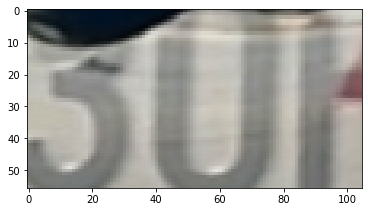

In [33]:
plt.imshow(img[x1[1]:x3[1], x1[0]:x2[0]])

In [35]:
dt_boxes[0]

array([[ 97.,  28.],
       [202.,  28.],
       [202.,  84.],
       [ 97.,  84.]], dtype=float32)

In [9]:
image_file_list = get_image_file_list(args.image_dir)
image_file_list = image_file_list[args.process_id::args.total_process_num]
text_sys = TextSystem(args)
is_visualize = True
font_path = args.vis_font_path
drop_score = args.drop_score
draw_img_save_dir = args.draw_img_save_dir
os.makedirs(draw_img_save_dir, exist_ok=True)
save_results = []

logger.info("In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', "
            "if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320")

# warm up 10 times
if args.warmup:
    img = np.random.uniform(0, 255, [640, 640, 3]).astype(np.uint8)
    for i in range(10):
        res = text_sys(img)

total_time = 0
cpu_mem, gpu_mem, gpu_util = 0, 0, 0
_st = time.time()
count = 0
for idx, image_file in enumerate(image_file_list):

    img, flag = check_and_read_gif(image_file)
    if not flag:
        img = cv2.imread(image_file)
    if img is None:
        logger.debug("error in loading image:{}".format(image_file))
        continue
    starttime = time.time()
    dt_boxes, rec_res = text_sys(img)
    elapse = time.time() - starttime
    total_time += elapse

    logger.debug(
        str(idx) + "  Predict time of %s: %.3fs" % (image_file, elapse))
    for text, score in rec_res:
        logger.debug("{}, {:.3f}".format(text, score))

    res = [{
        "transcription": rec_res[idx][0],
        "points": np.array(dt_boxes[idx]).astype(np.int32).tolist(),
    } for idx in range(len(dt_boxes))]
    save_pred = os.path.basename(image_file) + "\t" + json.dumps(
        res, ensure_ascii=False) + "\n"
    save_results.append(save_pred)

    if is_visualize:
        image = Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        boxes = dt_boxes
        txts = [rec_res[i][0] for i in range(len(rec_res))]
        scores = [rec_res[i][1] for i in range(len(rec_res))]
        print('boxes: ',boxes)
        print('txts: ',txts)
        print('scores: ', scores)
        draw_img = draw_ocr_box_txt(
            image,
            boxes,
            txts,
            scores,
            drop_score=drop_score,
            font_path=font_path)
        if flag:
            image_file = image_file[:-3] + "png"
        cv2.imwrite(
            os.path.join(draw_img_save_dir, os.path.basename(image_file)),
            draw_img[:, :, ::-1])
        logger.debug("The visualized image saved in {}".format(
            os.path.join(draw_img_save_dir, os.path.basename(image_file))))

logger.info("The predict total time is {}".format(time.time() - _st))
if args.benchmark:
    text_sys.text_detector.autolog.report()
    text_sys.text_recognizer.autolog.report()

if args.total_process_num > 1:
    save_results_path = os.path.join(draw_img_save_dir, f"system_results_{args.process_id}.txt")
else:
    save_results_path = os.path.join(draw_img_save_dir, "system_results.txt")

with open(save_results_path, 'w', encoding='utf-8') as f:
    f.writelines(save_results)

[2022/11/27 15:56:28] ppocr INFO: In PP-OCRv3, rec_image_shape parameter defaults to '3, 48, 320', if you are using recognition model with PP-OCRv2 or an older version, please set --rec_image_shape='3,32,320
boxes:  []
txts:  []
scores:  []
[2022/11/27 15:56:28] ppocr INFO: The predict total time is 0.022410869598388672
